In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 19.7 MB/s eta 0:00:00


Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 88.33%


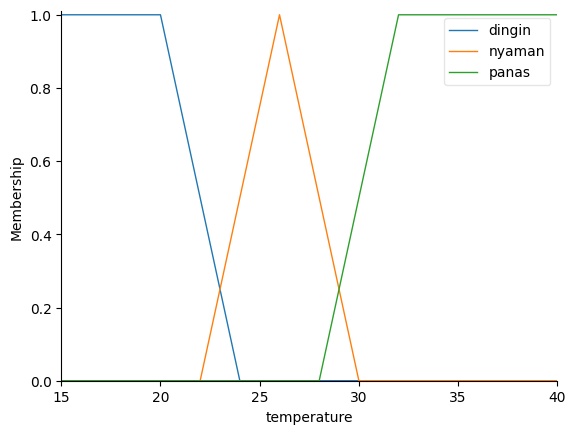

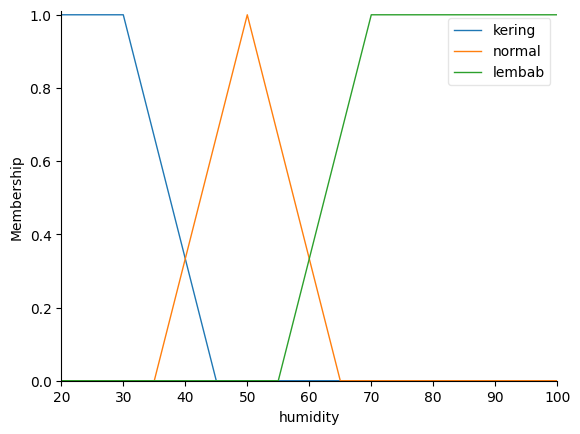

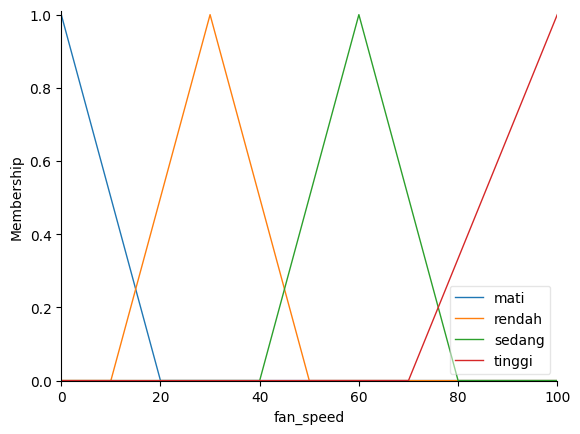

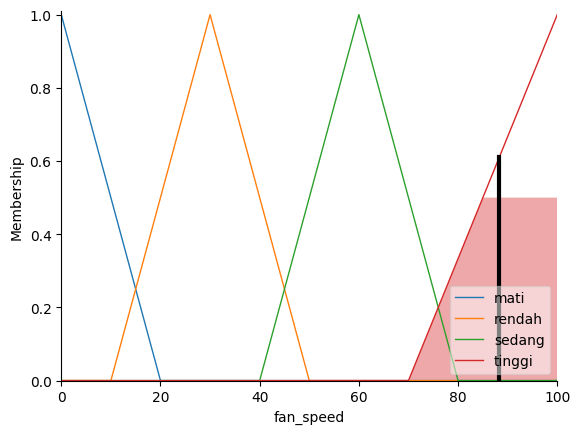


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 30.00%


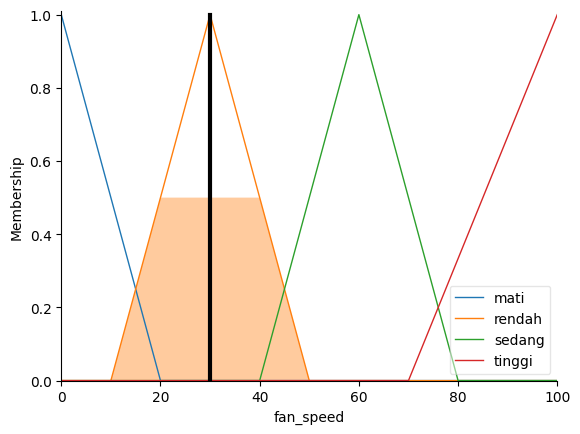

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# New fan speed membership functions (simplified)
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 20])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [10, 30, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [40, 60, 80])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [70, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rules = [
    ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati']),
    ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati']),
    ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah']),

    ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah']),
    ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang']),
    ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi']),

    ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi']),
    ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi']),
    ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['tinggi']),
]

# Create control system
ac_ctrl = ctrl.ControlSystem(rules)
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# 30 derajat suhu
ac.input['temperature'] = 30
ac.input['humidity'] = 75
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")
fan_speed.view(sim=ac)
plt.show()

# 22 derajat suhu
ac.input['temperature'] = 22
ac.input['humidity'] = 75
ac.compute()
print(f"\nUntuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")
fan_speed.view(sim=ac)
plt.show()


Suhu 28°C memiliki nilai keanggotaan pada dua kategori, yaitu "Nyaman" dan "Panas", karena dalam logika fuzzy, satu nilai input bisa termasuk ke dalam lebih dari satu himpunan fuzzy secara bersamaan. Pada sistem ini, himpunan "Nyaman" didefinisikan dengan fungsi keanggotaan segitiga yang mencakup rentang suhu dari 22°C hingga 30°C, dengan puncaknya di 26°C. Artinya, nilai 28°C masih termasuk dalam sisi kanan segitiga, meskipun derajat keanggotaannya mulai menurun dari nilai maksimum. Sementara itu, himpunan "Panas" dimodelkan menggunakan fungsi trapesium yang dimulai dari 28°C hingga 40°C. Karena 28°C berada di titik awal trapesium tersebut, maka suhu ini juga memiliki nilai keanggotaan di kategori "Panas". Dengan demikian, suhu 28°C masuk dalam area transisi atau tumpang tindih antara dua kategori tersebut dan memiliki derajat keanggotaan sebagian di keduanya.

Setelah dilakukan perubahan pada sistem fuzzy, khususnya pada fungsi keanggotaan variabel keluaran "fan speed", hasil yang diperoleh menjadi lebih sederhana dan mudah dipahami. Sebelumnya terdapat lima kategori fan speed, termasuk "maksimal", yang kini telah disederhanakan menjadi empat kategori saja: "mati", "rendah", "sedang", dan "tinggi". Dengan pengurangan jumlah kategori dan penyesuaian rentang nilai keanggotaannya, sistem menjadi lebih efisien dan tidak terlalu kompleks. Hal ini membuat hasil output lebih konsisten dan logis, terutama ketika diterapkan pada rentang suhu dan kelembaban yang bervariasi. Selain itu, sistem yang lebih ringkas juga memudahkan dalam hal pemeliharaan, pengujian, dan penyempurnaan di masa mendatang.